# Assignment 1: Introduction to Data Science and Python
*Group 11: Alexandra Parkegren & Albin Sjöstrand*

*Hours spent by Albin: 16.75 h  *

*Hours spent by Alexandra: 16.75 h  *

___
## Part 1: Download som data related to GDP per capita and life expentecy.

**a) Write a Python program that draws a scatter plot of GDP per capita vs. life expentecy. 
State any assumptions and motivate decisions that you make selecting data to be plotted, and in combining data.**




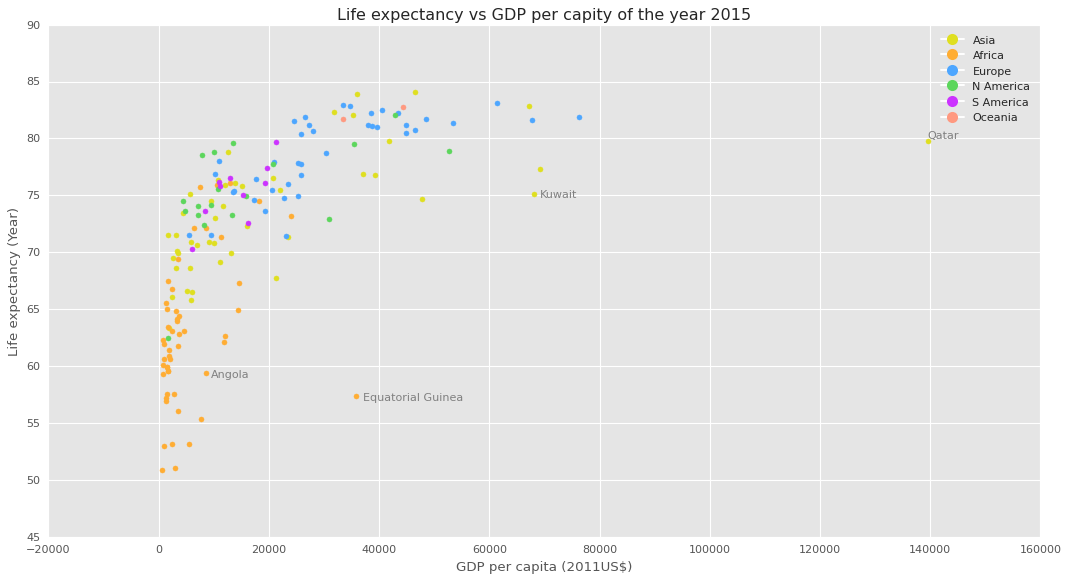

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np

yellow1='#dfdf20'
orange1='#ffad33'
blue1  ='#4da6ff'
green1 ='#5cd65c'
purple1='#cc33ff'
red1   ='#ff9980'
plt.figure(figsize=(16, 8))

df = pd.read_csv("life-expectancy-vs-gdp-per-capita.csv")


# only look at countries, remove continents data
#dftest = df[df['Code'].notna()] # one way to do it
df0 = df[pd.notnull(df['Code'])] # official panda way to do it

# select less data - only from 2015
df1 = df0.loc[df0['Year'].isin(['2015'])]

# split df 
dfC1 = df1.loc[df1['Continent'].isin(['Asia'])]
dfC2 = df1.loc[df1['Continent'].isin(['Africa'])]
dfC3 = df1.loc[df1['Continent'].isin(['Europe'])]
dfC4 = df1.loc[df1['Continent'].isin(['North America'])]
dfC5 = df1.loc[df1['Continent'].isin(['South America'])]
dfC6 = df1.loc[df1['Continent'].isin(['Oceania'])]

plt.scatter(dfC1['GDP per capita'],dfC1['Life expectancy'],color=yellow1)
plt.scatter(dfC2['GDP per capita'],dfC2['Life expectancy'],color=orange1)
plt.scatter(dfC3['GDP per capita'],dfC3['Life expectancy'],color=blue1)
plt.scatter(dfC4['GDP per capita'],dfC4['Life expectancy'],color=green1)
plt.scatter(dfC5['GDP per capita'],dfC5['Life expectancy'],color=purple1)
plt.scatter(dfC6['GDP per capita'],dfC6['Life expectancy'],color=red1)

#legend
l1 = Line2D([0],[0], marker='o', color='w', label='Asia', markerfacecolor=yellow1, markersize=10)
l2 = Line2D([0],[0], marker='o', color='w', label='Africa', markerfacecolor=orange1, markersize=10)
l3 = Line2D([0],[0], marker='o', color='w', label='Europe', markerfacecolor=blue1, markersize=10)
l4 = Line2D([0],[0], marker='o', color='w', label='N America', markerfacecolor=green1, markersize=10)
l5 = Line2D([0],[0], marker='o', color='w', label='S America', markerfacecolor=purple1, markersize=10)
l6 = Line2D([0],[0], marker='o', color='w', label='Oceania', markerfacecolor=red1, markersize=10)
plt.legend(handles=[l1,l2,l3,l4,l5,l6])


#plt.figure(figsize=(20,10))
plt.ylabel('Life expectancy (Year)')
plt.xlabel('GDP per capita (2011US$)')
plt.title('Life expectancy vs GDP per capity of the year 2015')


#labels
style11 = dict(size=10, color='gray')
plt.text(139538, 80, "Qatar", **style11)
plt.text(9500, 59, "Angola", **style11)
plt.text(36986, 57, "Equatorial Guinea", **style11)
plt.text(69200, 74.8, "Kuwait", **style11)

plt.show()

This is a very common graph to show all students in swedish schools, 
especially since Hans Rosling created GapMinder that illustrates these things.
Therefor both of us had a similar assumption of how the correlation would look like for this data and the different continents. 


**b) Consider whether the results obtained seem resonable and discuss what might be the explanation for the reults you obtained.**

It seems reasonable with the correlation between GDP per capita and life exptency where countries 
with lower GDP per capita has a smaller financial basis to, for example, develop a good health care system. 

We see a big variation at the far left where life expectancy differs a lot to similar GDP per capita.
This is very resonable considering life expenctancy is way more complex factors that are not considered in this data.
Life expectancy is only a mean value. For example, child mortality plays a big part in decreasing the life expectancy, 
as we learned from class.

We also notice how the curve flattens and can understand that in richer countries other factors take part, which can 
for example be explained by 
drug overdoses and suicides (source [ourworldindata.org](https://ourworldindata.org/us-life-expectancy-low) )

A high GDP per capita demonstrates a countries assets, not how it is distributed och handle. 
The GDP per capita of a country might increase while the life expectancy does not, due to not investing in health care.

But an overall conclusion is that life expecancy seems to increase up to a certain level hand in hand with GDP per capita, 
but we need to remind ourself that life expectancy is not equal to health and GDP per capita is not equal to wealth.

**c) Did you do any data cleaning (e.g., by removing entries that you think are not useful) for the task of drawing scatter plot(s) and the task of answering the questions d, e, f, and g?
 If so, explain what kind of entries that you chose to remove and why**

The restriction to only use scatter plot deminished our chances of displaying the history in a simple clear way (as we have seen in our second lecture in the plot called "life expectancy of the world population in 1800,1950 and 2012"). 
We therefor chose the year 2015 seeing that it contained the most data for the most countries and it was one of the latest data found for GDP per capita and life expectancy.
It is assumed that data exists in 2015 for all countries.

The data was cleaned from from continents that was also represented as entities in the table. This was done by removing all country codes that was null, i.e. 
remove continents since they do not have one, with the reason being that we only want to show countries in the graph.

Too not crowd our graph we only chose to include the names of a few countries and instead to plot the continents in different colors.
Yet again if this would have been another type of plot - lets say interactive, this is one of the things we would have liked to include in a nice way.

We could have removed some countries to simplify the connection between the two datas. 
Since this is a chart comparing average lifespan to different wealth, 
therefor we could perhaps have removed the countries with the same GDP per capita but different lifespans.
We could also have cut out Qatar in the far right of the graph the get a more zoomed in graph.
But in our opinion that would have made a much to simplified graph, 
displaying a correlation that is not always true. 
Too keep all of the countries is a reminder that there are more complexity behind the reasons for the data.


Yet again, to avoid crowding the plot we chose not to include extra things like different sizes or gradient of colors for number of inhabitants.

We notice how all of the countries follow a logarithmic path. 
We considered encorporated a logarithmic scale on our axis to show a more linear plot but we concluded this also seemed too misguiding.


**d) Which countries have a life expectancy higher than one standard deviation above the mean?**

We'll plot a list of the countries that is asked for

In [ ]:
import statistics as stats
import numpy as np

# Remove entities with NaNa values
dfNoNa = df1.dropna()

mean = stats.mean(dfNoNa['Life expectancy'])
standard_deviation = df1['Life expectancy'].std()

print('Mean:', mean)
print('Standard deviation:', standard_deviation)

#filter out the countries 
filtered_df = dfNoNa[(dfNoNa['Life expectancy'] > (mean + standard_deviation))]

#sort by life expectancy
filtered_and_sorted_df = filtered_df.sort_values(by=['Life expectancy'])

print(filtered_and_sorted_df[['Entity', 'Life expectancy']])


Mean: 71.88696385542168
Standard deviation: 7.799211933631916
               Entity  Life expectancy
43690          Taiwan           79.743
35836           Qatar           79.758
10720          Cyprus           80.350
11475         Denmark           80.475
40001        Slovenia           80.673
16519         Germany           80.770
4280          Belgium           80.969
47277  United Kingdom           81.052
2730          Austria           81.182
14540         Finland           81.196
35546        Portugal           81.224
20554         Ireland           81.344
17030          Greece           81.548
25063      Luxembourg           81.636
30904     New Zealand           81.713
30613     Netherlands           81.715
26673           Malta           81.896
32338          Norway           81.912
7572           Canada           82.026
40977     South Korea           82.100
15493          France           82.224
43029          Sweden           82.251
20845          Israel           82.340
19

** e) Which countries have high life expectancy but have low GDP?**

It depends on what is considered as low GDP. Countries that are below the mean of GDP per capita (~$18,000) while higher than the mean life expectancy (~72 years)
are the 40 countries showed in the table below.



In [ ]:
gdp_mean = stats.mean(dfNoNa['GDP per capita'])
le_mean = stats.mean(dfNoNa['Life expectancy'])

filtered_df = dfNoNa[(dfNoNa['GDP per capita'] <= gdp_mean) & (dfNoNa['Life expectancy'] >= le_mean)]

#print('GDP per capita mean: $', round(gdp_mean, 2))
#print('Life expectancy mean: ', round(le_mean, 2))
print(filtered_df[['Entity', 'Life expectancy', 'GDP per capita']])

                       Entity  Life expectancy  GDP per capita
560                   Albania           78.025         10947.0
780                   Algeria           76.090         13024.0
2097                  Armenia           74.467          9552.0
2951               Azerbaijan           72.266         16045.0
3832                 Barbados           78.801         10030.0
5520   Bosnia and Herzegovina           76.865         10305.0
5961                   Brazil           74.994         15377.0
6472                 Bulgaria           74.584         17254.0
7792               Cape Verde           72.117          6358.0
8814                    China           75.928         12002.0
9036                 Colombia           76.531         12858.0
9766               Costa Rica           79.565         13568.0
10430                    Cuba           78.561          7889.0
11915                Dominica           74.194          9537.0
12135      Dominican Republic           73.241         

** e) **

If the question wants to refer to only GDP we do another calculation for that.
We calculate GDP from GDP per capita divided by population 
( according to [source](http://www.differencebetween.net/business/difference-between-gdp-and-gdp-per-capita/) ). 


In [ ]:
#create a new row with GDP (Generates warning which we can't resolve)
dfNoNa['GDP (per millions)'] = dfNoNa.apply(lambda row: ((row['Total population'] * row['GDP per capita'])/1000000), axis=1)

#low GDP
gdp_mean = stats.mean(dfNoNa['GDP (per millions)'])
gdp_standard_deviation = dfNoNa['GDP (per millions)'].std()

#high life expectancy
le_mean = stats.mean(dfNoNa['Life expectancy'])
le_standard_deviation = dfNoNa['Life expectancy'].std()


filtered_df = dfNoNa[(dfNoNa['GDP (per millions)'] < (gdp_mean + gdp_standard_deviation)) & (dfNoNa['Life expectancy'] > (le_mean + le_standard_deviation))]
print(filtered_df[['Entity', 'Life expectancy', 'GDP (per millions)']])



               Entity  Life expectancy  GDP (per millions)
2510        Australia           82.794         1061049.152
2730          Austria           81.182          389209.755
4280          Belgium           80.969          446225.928
7572           Canada           82.026         1543540.788
10720          Cyprus           80.350           30073.383
11475         Denmark           80.475          255657.971
14540         Finland           81.196          207839.520
15493          France           82.224         2478088.944
17030          Greece           81.548          261649.700
19005       Hong Kong           84.043          334177.744
19445         Iceland           82.481           13388.760
20554         Ireland           81.344          248286.544
20845          Israel           82.340          253133.962
21075           Italy           82.828         2100420.994
25063      Luxembourg           81.636           38444.868
26673           Malta           81.896           11534.4

**f) Does every strong economy (normally indicated by GDP) have high life expectancy?**


These countries with a high GDP will not all pass for a high life expectancy, 
as the countries we found in task d). Therefor the answer is no, not necessarily. 

In [ ]:
filtered_df = dfNoNa[(dfNoNa['GDP (per millions)'] > (gdp_mean + gdp_standard_deviation)) ]
print(filtered_df[['Entity', 'Life expectancy', 'GDP (per millions)']])


              Entity  Life expectancy  GDP (per millions)
5961          Brazil           74.994        3.144166e+06
8814           China           75.928        1.688499e+07
16519        Germany           80.770        3.797043e+06
19669          India           68.607        7.387947e+06
21523          Japan           83.879        4.611300e+06
36347         Russia           71.464        3.351763e+06
47501  United States           78.910        1.687530e+07


**g) Related to question f, what would happen if you use GDP per capita as an indicator of strong economy? 
Explain the results you obtained, and discuss any insights you get from comparing the results of g and f.**

The immediate natural way of interpret someting is to simplify even a simple graph, 
hence think of GDP per capita as a countrys wealth. And since GDP per capita is so commonly used, have been used for so long and will be used since it is easy to find the data for so many coutries,
its understandable that we make the connection. 

But just like all data and all types of charts it can be very misleading.
For example thinking nothing have happened in some vs understanding that there are different factors to be taken into consideration.
To once again mention Hans Rosling that underlined in his presentations that 
we all look at things with a lot of preconceptions. 

If all charts could be considered as only suggestions to what to dig deeper into, charts would feel more safe to use.
 
GDP is a reference to a countries assets, but we understand that an economy is much more complex.
For example a country can have more assets in natural resources that does not show up in GDP, 
and that the economy is heavily affected by the countries own politics and what other countries do.

Although GDP per capita is a better measurement than only considering GDP, since it at least 
account for another factor that determine how strong a country's economy is. We can see in the results 
that the countries differs in which are considered a strong economy. For example Brazil has a strong 
economy if only considering GDP (seen in task f), but with GDP per capita it is not at all considered as strong (not even in the list below).


In [ ]:
gdp_per_capita_mean = stats.mean(dfNoNa['GDP per capita'])
gdp_per_capita_standard_deviation = dfNoNa['GDP per capita'].std()

filtered_gdp_df = dfNoNa[(dfNoNa['GDP per capita'] > gdp_per_capita_mean + gdp_per_capita_standard_deviation)]

#sort by gdp
filtered_and_sorted_df = filtered_gdp_df.sort_values(by=['GDP per capita'])

#print('GDP per capita mean: $', round(gdp_mean, 2))
#print('Life expectancy mean: ', round(le_mean, 2))
print(filtered_and_sorted_df[['Entity', 'GDP per capita']])


                     Entity  GDP per capita
14540               Finland         37920.0
15493                France         38448.0
47277        United Kingdom         38749.0
3392                Bahrain         39197.0
4280                Belgium         39531.0
19445               Iceland         40572.0
43690                Taiwan         41805.0
7572                 Canada         42844.0
43029                Sweden         43464.0
2510              Australia         44336.0
2730                Austria         44845.0
11475               Denmark         44939.0
16519               Germany         46426.0
19005             Hong Kong         46504.0
38388          Saudi Arabia         47737.0
30613           Netherlands         48463.0
47501         United States         52591.0
20554               Ireland         53372.0
43250           Switzerland         61476.0
39491             Singapore         67110.0
25063            Luxembourg         67804.0
22626                Kuwait     

___
## Part 2: Download some other data sets, e.g. related to hapiness and life satisfaction, trust, currption, etc.

**a) Think of several meaningful questions that can be answered with these data, make several informative visualisations to answer those questions. 
State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data.**

The questions we ask ourself are:

- Are life satisfaction correlated with curruption in countries?
- Is happiness related to economy inequality?
- Does inequality (Gini coefficient) affect Human Development Index (HDI)?



**Happiness vs. Corruption**

[Hapiness source](https://ourworldindata.org/grapher/happiness-wvs-vs-gallup)
[Corruption source](https://ourworldindata.org/grapher/ti-corruption-perception-index?tab=chart)

Happiness vs Corruption was chossen because happiness are determined by many factors and it is interesting to see if people of different contries' population
are affected by corruption in terms of what makes them happy. It is worth noting that the data is about percieved corruption and may therefore differ
from actual corruption (which might be hard to find data about, because you know; corrupt people). So even though a country may be more or less corrupt, 
the people of that country might still have their own thought despite what is being repported, and that it may then affect their overall happiness.

The data for this plot is selected from years that have values present, and the countries that were selected was choosen on the account of what is being
reported as more and less corrupt countries. The years selected are from 2012 to 2018, and is worth noting that changes might not be that obvious 
during that span of years.

**Happiness vs. Economy Inequality**

[Hapiness source](https://ourworldindata.org/grapher/happiness-wvs-vs-gallup)
[Economy Inequality](https://ourworldindata.org/grapher/economic-inequality-gini-index?time=2013)

We suspect economy inequality could be something that emerge from corruption. Will they give the same result?

We assume that a very high economy inequality will give a low happiness but otherwise we hope 
that no matter the salary inequality, people can be happy. 

Unfortenutely we did not find data of economy inequality for all countries, but we made sure to use all we had.
We made sure to then reduce the list of happiness data to be able to compare them. So countries that did not have
data for happiness or economoc inequality are removed (which can imply removing countries could be observed for one
of happiness or inequality, but not both as in this plot). The data was selected for the latest available year, which was 2014. 



**HDI vs. Gini Coefficient**

[HDI source](https://www.gapminder.org/tools/#$state$marker$axis_y$which=hdi_human_development_index&scaleType=linear&spaceRef:null;;;&chart-type=linechart)
[GINI source](https://www.gapminder.org/tools/#$state$marker$axis_y$which=gini&domainMin:null&domainMax:null&zoomedMin:null&zoomedMax:null&scaleType=linear&spaceRef:null;;;&chart-type=linechart)

Assumptions for the data for HDI and Gini are that the selected countries have actual data for the range of years selected. 
This is a concern for these data sets since they both have years for the data where some sort of defualt value are inserted, for example for earlier years
that did not record any data, and also some predictions of values in the future. The years are then selected from values that changes between
the years.

The data is also converted into having the countries as indexes to make it much simpler to handle when locating the wanted countries. This could be considered
a little bit sketchy since it will lose each row index, but for this plotting it's not necessary to keep them.

In order to not having to select each year the data should be from, it is instead made into an array. Usually this can be done with integers and using the
range() to create that, but these indexes required each year to be matched with a string.

Both graphs combines the data from 5 different countries, with somewhat different types of data. It is purposely not combined into one graphs since it may
appear cluttered with more inputs (compare this to the plot above). 

The reason for comparing the HDI and Gini coefficient, is that it would be interesting to see if what is considered to increase HDI (such as life expectancy, education,
per capita income), but which do not consider soicital inequalities. One of country might decrease in one graphs, but increase in the other and not be effected
in the way the are seperataly measured.


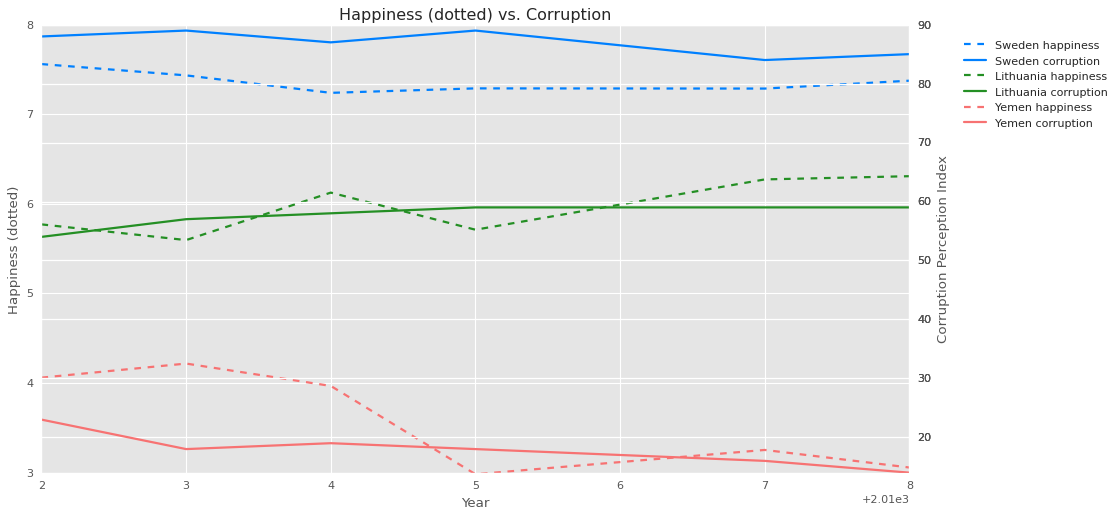

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_lifesat = pd.read_csv("Happiness-WVS-vs-Gallup.csv")
df_corruption = pd.read_csv("TI-corruption-perception-index.csv")


# get data from a country and cut to get the same years

# Sweden
df_lifesat_sweden= df_lifesat.loc[df_lifesat['Entity'].isin(['Sweden'])]
df_corruption_sweden = df_corruption.loc[df_corruption['Entity'].isin(['Sweden'])]
df_lifesat_sweden_6years = df_lifesat_sweden.loc[df_lifesat['Year'].isin(['2012','2013','2014','2015','2015','2017','2018'])]
df_corruption_sweden_6years = df_corruption_sweden.loc[df_corruption['Year'].isin(['2012','2013','2014','2015','2015','2017','2018'])]
xs1 = df_lifesat_sweden_6years['Year']
ys1 = df_lifesat_sweden_6years['Life satisfaction in Cantril Ladder (World Happiness Report 2019)']
xs2 = df_corruption_sweden_6years['Year']
ys2 = df_corruption_sweden_6years['Corruption Perception Index - Transparency International (2018)']

# Lithuania
df_lifesat_lithuania= df_lifesat.loc[df_lifesat['Entity'].isin(['Lithuania'])]
df_corruption_lithuania = df_corruption.loc[df_corruption['Entity'].isin(['Lithuania'])]
df_lifesat_lithuania_6years = df_lifesat_lithuania.loc[df_lifesat['Year'].isin(['2012','2013','2014','2015','2015','2017','2018'])]
df_corruption_lithuania_6years = df_corruption_lithuania.loc[df_corruption['Year'].isin(['2012','2013','2014','2015','2015','2017','2018'])]
xl1 = df_lifesat_lithuania_6years['Year']
yl1 = df_lifesat_lithuania_6years['Life satisfaction in Cantril Ladder (World Happiness Report 2019)']
xl2 = df_corruption_lithuania_6years['Year']
yl2 = df_corruption_lithuania_6years['Corruption Perception Index - Transparency International (2018)']

# Yemen
df_lifesat_yemen= df_lifesat.loc[df_lifesat['Entity'].isin(['Yemen'])]
df_corruption_yemen = df_corruption.loc[df_corruption['Entity'].isin(['Yemen'])]
df_lifesat_yemen_6years = df_lifesat_yemen.loc[df_lifesat['Year'].isin(['2012','2013','2014','2015','2015','2017','2018'])]
df_corruption_yemen_6years = df_corruption_yemen.loc[df_corruption['Year'].isin(['2012','2013','2014','2015','2015','2017','2018'])]
xy1 = df_lifesat_yemen_6years['Year']
yy1 = df_lifesat_yemen_6years['Life satisfaction in Cantril Ladder (World Happiness Report 2019)']
xy2 = df_corruption_yemen_6years['Year']
yy2 = df_corruption_yemen_6years['Corruption Perception Index - Transparency International (2018)']

blue2 = '#0080ff'
green2 = '#248f24'
red2 = '#f77272'

# Create figure and axis objects with subplots('Horizontally stacked subplots' )
fig, ax1 = plt.subplots(figsize=(14,7))

# Sweden
ps1, = ax1.plot(xs1, ys1, '--', color=blue2, linewidth=2, label='Sweden happiness')
ax1.set_ylim([3, 8])
# second y-axis for sweden
ax2 = ax1.twinx()
ps2,= ax2.plot(xs2, ys2,color=blue2, linewidth=2, label='Sweden corruption')
ax2.set_ylim([14, 90])

# Lithuania
pl1, = ax1.plot(xl1, yl1, '--', color=green2, linewidth=2, label='Lithuania happiness')
ax1.set_ylim([3, 8])
ax2  = ax1.twinx()
pl2, = ax2.plot(xl2, yl2,color=green2, linewidth=2, label='Lithuania corruption')
ax2.set_ylim([14, 90])

# Yemen 
py1, = ax1.plot(xy1, yy1, '--', color=red2, linewidth=2, label='Yemen happiness')
ax1.set_ylim([3, 8])
ax2  = ax1.twinx()
py2, = ax2.plot(xy2, yy2,color=red2, linewidth=2, label='Yemen corruption')
ax2.set_ylim([14, 90])

ax1.set_xlabel("Year")
ax1.set_ylabel("Happiness (dotted)")
ax2.set_ylabel("Corruption Perception Index")
plt.title('Happiness (dotted) vs. Corruption')

# Legend
fig.legend(handles=[ps1,ps2,pl1,pl2,py1,py2],bbox_to_anchor=(0.94,0.89), loc='upper left')

plt.show()



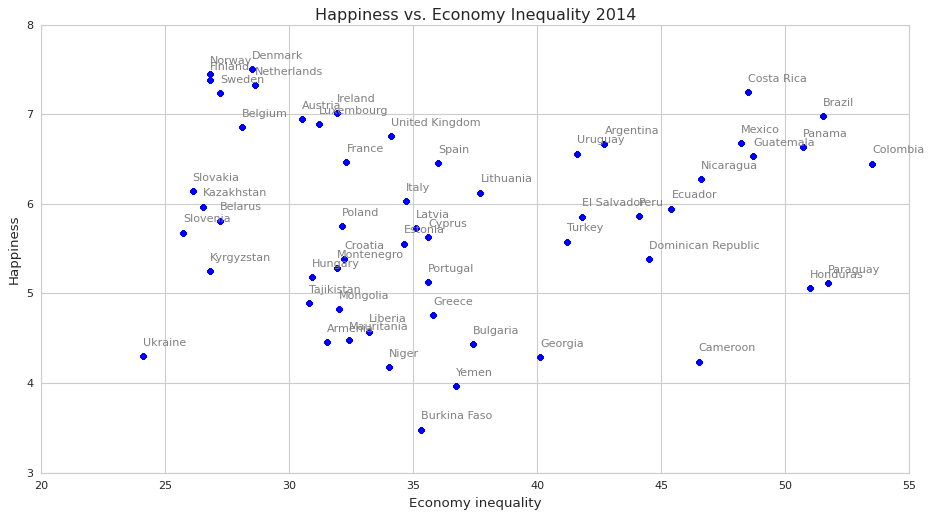

In [ ]:
import pycountry
plt.style.use(['seaborn-whitegrid'])

df_happiness = pd.read_csv("happiness-cantril-ladder.csv")
df_inequality = pd.read_csv("economic-inequality-gini-index.csv")

# look at only 2014
df_ineq_2014 = df_inequality.loc[df_inequality['Year'].isin(['2014'])]
df_happ_2014 = df_happiness.loc[df_happiness['Year'].isin(['2014'])]


# the ineq list has data for fewer countries, therefor we need to 
# find out what countries we have data for
relevant_countries = []
for co in list(pycountry.countries):
    df_ineq_2014_co = df_ineq_2014.loc[df_inequality['Entity'].isin([co.name])]
    if  not df_ineq_2014_co.empty:
        relevant_countries.append(co.name)

#quick way to remove the only country the other list did not have
relevant_countries.remove('Iceland') 


#only the countries we want
df_happ_2014_somecountries = df_happ_2014.loc[df_happiness['Entity'].isin(relevant_countries)]
axis_happ = df_happ_2014_somecountries['Life satisfaction in Cantril Ladder (World Happiness Report 2019)']
countries = df_happ_2014_somecountries['Entity']

df_ineq_2014_somecountries = df_ineq_2014.loc[df_ineq_2014['Entity'].isin(relevant_countries)]
axis_ineq = df_ineq_2014_somecountries['GINI index (World Bank estimate)']


# plot all countries we have data for
plt.subplots(figsize=(14,7))

x = axis_ineq.values
y = axis_happ.values
for i,txt in enumerate(countries.values):
    plt.annotate(txt, (x[i], y[i]), xytext=(0,10), textcoords='offset points', color='gray')
    plt.scatter(x,y,color='blue')

plt.xlabel("Economy inequality")
plt.ylabel("Happiness")
plt.title('Happiness vs. Economy Inequality 2014')

plt.show()

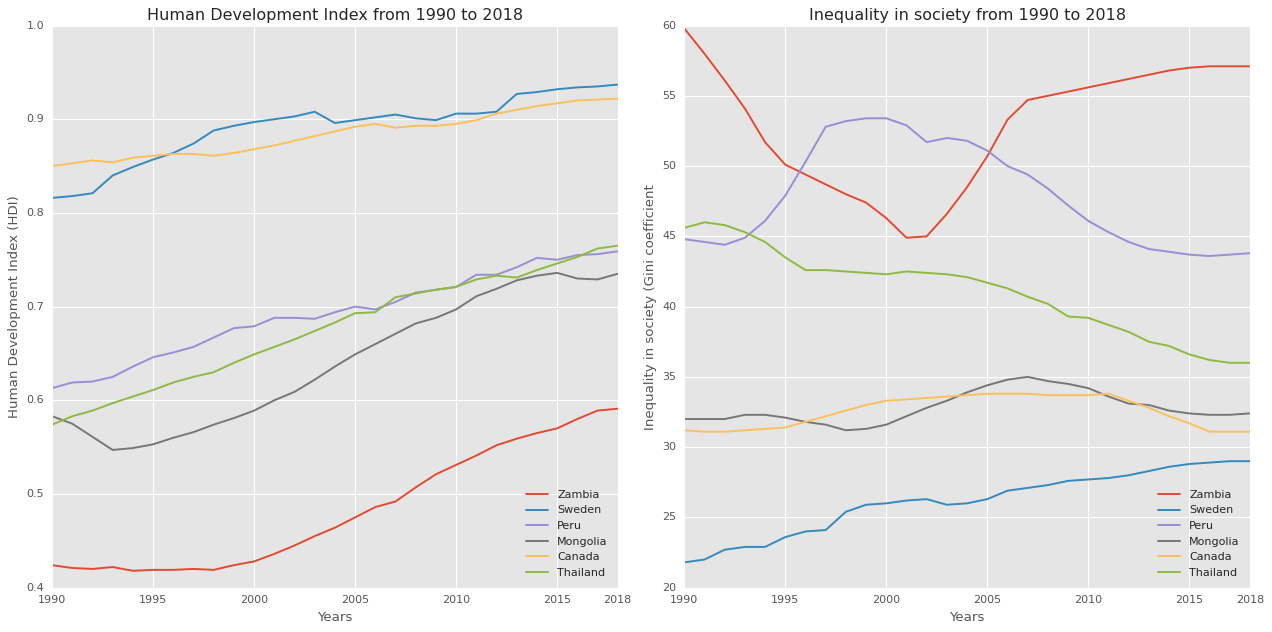

In [ ]:
df_hdi = pd.read_csv("hdi_human_development_index.csv")
#df_hdi.isnull().sum()
df_hdi = df_hdi.set_index('country')
plt.style.use(['ggplot'])

df_gini = pd.read_csv("gini.csv")
df_gini = df_gini.set_index('country')
#print(df_gini)

# create an array with string of years in order to utlise for specifc countries in a certain range
years = []

# range of years. set to 1990-2019 with the most useful data
for i in range(1990, 2019):
    years.append(str(i).zfill(1))

#print(years)

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,8) )

# used for debug if total axis appeared in dataframe
#df_hdi.drop(['Total'], axis=1, inplace=True)
#print(df_hdi)

# create first plot of HDI
ax1.plot(df_hdi.loc['Zambia', years], label='Zambia')
ax1.plot(df_hdi.loc['Sweden', years], label='Sweden')
ax1.plot(df_hdi.loc['Peru', years], label='Peru')
ax1.plot(df_hdi.loc['Mongolia', years], label='Mongolia')
ax1.plot(df_hdi.loc['Canada', years], label='Canada')
ax1.plot(df_hdi.loc['Thailand', years], label='Thailand')

# create second plot of Gini
ax2.plot(df_gini.loc['Zambia', years], label='Zambia')
ax2.plot(df_gini.loc['Sweden', years], label='Sweden')
ax2.plot(df_gini.loc['Peru', years], label='Peru')
ax2.plot(df_gini.loc['Mongolia', years], label='Mongolia')
ax2.plot(df_gini.loc['Canada', years], label='Canada')
ax2.plot(df_gini.loc['Thailand', years], label='Thailand')

# Since subplots, ticks has to be set manually in order
# for not to have all years displayed
ax1.set_xticks([0, 5, 10, 15, 20, 25,28])
ax1.set_xlabel("Years")
ax1.set_ylabel("Human Development Index (HDI)")
ax1.title.set_text('Human Development Index from 1990 to 2018')
ax1.legend(loc='lower right')

# subplot 2 settings
ax2.set_xticks([0, 5, 10, 15, 20, 25,28])
ax2.set_xlabel("Years")
ax2.set_ylabel("Inequality in society (Gini coefficient")
ax2.title.set_text('Inequality in society from 1990 to 2018')
ax2.legend(loc='lower right')

fig.tight_layout()
plt.show()

**b) Discuss any observations that you make, or insights obtained, from the datavisualisations.**

**Happiness vs. Corruption**

First off we can confirm that Sweden has much less corruption than Lithuania, which in turn has lower corruption than Yemen, seen as a higher Corruption Index on the right y-axis.

If we compare only one year, we see that Sweden, a less corrupted country(right y-axis) is more happy(left y-axis), 
and a less happier Lithuania has a bit more corruption. Yemen with a lot of corruption has the lowest happiness index.
We can conclude that when corruption increases, happiness will decrease.

How the two correlates over time is a harder question to answer since we only have data for a few years
For Yemen we see the biggest increase of corruption which seems to decrease the happiness.
For Lithuania happiness increases a bit when corruption drop.
But Sweden doesn't show the same clear correlation. 
Perhaps we can see that a less corrupted country has a standard level of happiness.
But these are vauge conclusion that we interpret as a indicator that there are more other things to consider.  

**Happiness vs. Economy Inequality**

Overall the plot shows us very big variety and no easy correlation. 
This answer one of our question that all economy inequality does not come from corruption.

One observation is that if you look at those countries that are reported as being happy, are also in the lower scale of economic inequality. But this is not
always true, as can be seen with countries such as Costa Rica or Brazil. 
We conclude that even though the inequality is high, it might not be true for not being happy.

It is also important to note that what affects people's perception of being happy might not always depend only on economy, 
and that it may differ from different cultures. That is something that can be drawn as a weak correlation between different cultures, since multiple countries in central and south america are relativly
high on the happiness scale, as well as having high econmoci inequality. In comparision a majority of countries located to the lower scale of inequality are
european countires, while at the same time happiness are still differing from more similar cultures.

**HDI vs. Gini Coefficient**

For the graphs with HDI and Gini we can see that they are indeed not related. We assumed that they might not have any correlation between them, and that is
true for most of the countries with a clear expection for Thailand. There we can draw some conclusions that it has improved on both fronts, where the HDI has
increased and at the same time the inequality index has decreased. It it very interesting to see that the different way we measure what is considered to be "good"
does not always include all aspects. For example with Sweden that has steadily improved on the HDI, has instead had more and more inequalities since 1990. 
